<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

df=pd.read_csv('sample_data.csv')

In [9]:
# Preprocessing
df = df.dropna()
X = df[['Temperature', 'Humidity', 'WindSpeed', 'Rainfall']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# DBSCAN clustering
db = DBSCAN(eps=1.2, min_samples=3)
labels = db.fit_predict(X_scaled)
df['Cluster'] = labels
# Print cluster summary
print(df.groupby('Cluster')[['Temperature', 'Humidity', 'WindSpeed', 'Rainfall']].mean())

         Temperature   Humidity  WindSpeed    Rainfall
Cluster                                               
-1         26.201831  71.263582  13.806524  112.444477
 0         25.973404  48.483405  17.231139   28.264936
 1         24.668461  72.751124  16.270924   97.024870


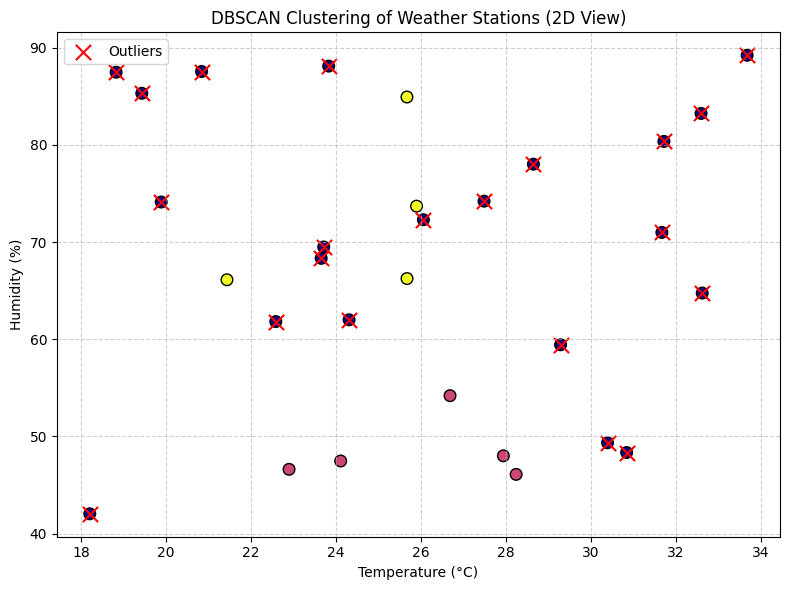

In [11]:
# 2D Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(df['Temperature'], df['Humidity'], c=df['Cluster'], cmap='plasma', s=70, edgecolors='k')
outliers = df[df['Cluster'] == -1]
plt.scatter(outliers['Temperature'], outliers['Humidity'], color='red', marker='x', s=120, label='Outliers')
plt.title('DBSCAN Clustering of Weather Stations (2D View)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

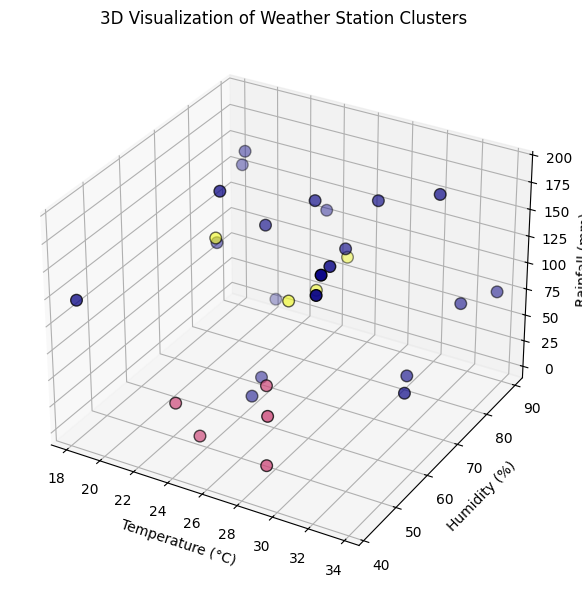

In [12]:
# 3D Scatter Plot (improved visualization)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Temperature'], df['Humidity'], df['Rainfall'],
           c=df['Cluster'], cmap='plasma', s=70, edgecolors='k')

ax.set_title('3D Visualization of Weather Station Clusters')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Rainfall (mm)')
plt.tight_layout()
plt.show()